# Problem 3: Google Playstore Apps
Load the Excel data file GooglePlaystore.xlsx (10K records) into a Pandas DataFrame (see the Pandas read_excel method), and perform the following tasks on it.

In [156]:
import pandas as pd
apps = pd.read_excel("../data/GooglePlaystore.xlsx")

## Preprocessing
1. Often there are outliers which do not match the overall data type. There is one record in this data where the “Reviews” has value “3.0M” which does not match the rest of the data. Remove that record.

In [157]:
row = apps[apps['Reviews'] == "3.0M"]
apps.drop(row.index, axis='index')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08 00:00:00,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,2017-01-20 00:00:00,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,2015-01-19 00:00:00,Varies with device,Varies with device


2. Remove rows where any of the columns has the value “Varies with device”.

In [158]:
rows = (apps == 'Varies with device').any()
for col in [i[0] for i in rows.items() if i[1]]:
    apps = apps.loc[apps[col] != 'Varies with device']

4. The values in the Android version column should be floats. Strip the trailing non-numeric characters from all values (ie. the words “ and up”), so the result is a number. If there are multiple decimal places (eg. “x.y.z”), keep only the first two parts (eg “x.y”). For example, the value “4.1 and up” should be changed to “4.1”. The value “4.5.6 and up” should be changed to “4.5”. The value “5.6.7” should be changed to “5.6”. If there is a range (eg. 5.0 – 8.0), only consider the first number. For example, the value “5.0 – 8.0” should be changed to “5.0”. The value “4.0.3 – 7.1.1” should be changed to “4.0”.

In [159]:
apps['Android Ver'] = apps['Android Ver'].replace(r"(\d+\.\d+).*",r"\1",regex=True)

4. The “Installs” column must have integer values. For values that have commas, remove the commas. For values that have a ‘+’ at the end, remove the ‘+’. Keep only those rows that have an integer value after these edits.

In [160]:
apps['Installs'] = apps['Installs'].replace(r"(\d+)\+", r"\1", regex=True).replace(",","", regex=True)
apps['Installs'] = pd.to_numeric(apps['Installs'], errors='coerce')
apps['Installs'] = apps['Installs'].values.astype(int)
apps = apps[apps.notnull()]
display(apps)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1
10835,FR Forms,BUSINESS,NaN,0,9.6M,10,Free,0,Everyone,Business,2016-09-29 00:00:00,1.1.5,4.0
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1


5. For missing rating values, if the number of reviews is less than 100 and installations is less than 50000, remove the row. Else, fill the missing value with the average value (rounded to 2 decimal places) for the Category of that row.

In [161]:
apps['Reviews'] = pd.to_numeric(apps['Reviews'],errors='coerce')
apps['Rating'][apps['Reviews'] < 1000][apps['Installs'] < 50000].dropna()
# print(apps['Rating'].mean())
apps['Rating'].fillna(apps['Rating'].mean())

0        4.100000
1        3.900000
2        4.700000
4        4.300000
5        4.400000
           ...   
10834    4.000000
10835    4.174359
10836    4.500000
10837    5.000000
10838    4.174359
Name: Rating, Length: 9060, dtype: float64

6. In Size column, convert “M” (millions) and “K” (thousands) values into integers. For instance, 8.7M should be converted to 8700000 and 2.4K should be converted to 2400.

In [162]:
def convert(x):
    if type(x) == int:
        return x
    elif 'K' in x:
        return float(x.replace('K','')) * 10**3
    elif 'M' in x:
        return float(x.replace('M','')) * 10**6
apps['Size'] = apps['Size'].apply(convert)

## Analysis
For the following tasks, do preprocessing or changing of data types in the data frame as required.
1. Describe (use DataFrame describe method) the category-wise rating statistics. In other words, for each category, describe the statistics (count, mean, etc.) for ratings in that category.

In [163]:
display(apps.groupby('Category').describe())
# for cat in apps['Category'].unique():
#     print(cat)
#     display(apps[apps['Category'] == cat].describe())
#     print("\n"+"-"*16)

ART_AND_DESIGN


,Rating,Reviews,Size,Installs
count,58.000000,61.000000,6.100000e+01,6.100000e+01
mean,4.358621,14290.147541,1.216393e+07,8.088213e+05
std,0.368513,44385.833689,9.705755e+06,2.294197e+06
min,3.200000,0.000000,1.200000e+06,0.000000e+00
25%,4.100000,132.000000,4.500000e+06,1.000000e+04
50%,4.400000,450.000000,8.700000e+06,1.000000e+05
75%,4.700000,3632.000000,1.900000e+07,1.000000e+05
max,5.000000,224399.000000,3.900000e+07,1.000000e+07



----------------
AUTO_AND_VEHICLES


,Rating,Reviews,Size,Installs
count,62.000000,74.000000,7.200000e+01,7.400000e+01
mean,4.146774,9735.162162,2.063472e+07,4.563542e+05
std,0.569935,34377.454639,2.036275e+07,1.409602e+06
min,2.100000,0.000000,1.100000e+06,1.000000e+00
25%,3.900000,12.500000,5.250000e+06,1.000000e+03
50%,4.250000,223.500000,1.600000e+07,7.500000e+04
75%,4.500000,2362.000000,3.300000e+07,1.000000e+05
max,4.900000,197136.000000,9.700000e+07,1.000000e+07



----------------
BEAUTY


,Rating,Reviews,Size,Installs
count,37.000000,47.000000,4.700000e+01,4.700000e+01
mean,4.291892,3975.659574,1.379574e+07,2.914245e+05
std,0.370719,10545.361087,1.294695e+07,7.711123e+05
min,3.100000,0.000000,2.200000e+06,5.000000e+01
25%,4.000000,35.500000,3.700000e+06,1.000000e+04
50%,4.300000,182.000000,9.200000e+06,5.000000e+04
75%,4.600000,1982.000000,1.900000e+07,1.000000e+05
max,4.900000,49790.000000,5.700000e+07,5.000000e+06



----------------
BOOKS_AND_REFERENCE


,Rating,Reviews,Size,Installs
count,144.000000,197.000000,1.890000e+02,1.970000e+02
mean,4.320139,20580.852792,1.384603e+07,7.104674e+05
std,0.457812,68500.697279,1.534071e+07,2.112034e+06
min,2.700000,0.000000,1.400000e+06,1.000000e+00
25%,4.100000,7.000000,4.200000e+06,1.000000e+03
50%,4.400000,111.000000,8.000000e+06,1.000000e+04
75%,4.625000,2539.000000,1.700000e+07,1.000000e+05
max,5.000000,445756.000000,8.700000e+07,1.000000e+07



----------------
BUSINESS


,Rating,Reviews,Size,Installs
count,245.000000,3.990000e+02,3.880000e+02,3.990000e+02
mean,4.119184,1.349967e+04,1.487629e+07,1.092929e+06
std,0.663942,7.877791e+04,1.553469e+07,7.648451e+06
min,1.000000,0.000000e+00,1.100000e+06,0.000000e+00
25%,3.800000,1.000000e+00,4.300000e+06,1.000000e+02
50%,4.300000,1.300000e+01,9.700000e+06,1.000000e+03
75%,4.500000,4.905000e+02,2.000000e+07,5.000000e+04
max,5.000000,1.002861e+06,9.800000e+07,1.000000e+08



----------------
COMICS


,Rating,Reviews,Size,Installs
count,48.000000,50.000000,4.800000e+01,5.000000e+01
mean,4.154167,11754.940000,1.399375e+07,3.317230e+05
std,0.556187,36713.737324,1.090644e+07,7.643420e+05
min,2.800000,1.000000,2.200000e+06,5.000000e+01
25%,3.775000,155.500000,5.500000e+06,1.000000e+04
50%,4.400000,1008.000000,1.000000e+07,5.000000e+04
75%,4.600000,4795.250000,2.025000e+07,4.000000e+05
max,5.000000,238970.000000,4.000000e+07,5.000000e+06



----------------
COMMUNICATION


,Rating,Reviews,Size,Installs
count,209.000000,2.630000e+02,2.340000e+02,2.630000e+02
mean,4.100957,4.448933e+05,1.321453e+07,1.878305e+07
std,0.503831,2.048208e+06,1.300103e+07,8.186166e+07
min,1.000000,0.000000e+00,1.000000e+06,1.000000e+00
25%,3.900000,8.000000e+00,3.700000e+06,5.000000e+02
50%,4.200000,4.810000e+02,8.550000e+06,5.000000e+04
75%,4.400000,4.108550e+04,1.700000e+07,5.000000e+06
max,5.000000,1.771485e+07,6.600000e+07,5.000000e+08



----------------
DATING


,Rating,Reviews,Size,Installs
count,173.000000,212.000000,2.110000e+02,2.120000e+02
mean,3.957803,18398.608491,1.670427e+07,6.692491e+05
std,0.666132,52392.804613,1.450756e+07,1.843255e+06
min,1.000000,0.000000,1.200000e+06,1.000000e+00
25%,3.600000,13.250000,5.500000e+06,1.000000e+03
50%,4.100000,602.000000,1.200000e+07,5.000000e+04
75%,4.400000,7779.000000,2.400000e+07,5.000000e+05
max,5.000000,285838.000000,7.700000e+07,1.000000e+07



----------------
EDUCATION


,Rating,Reviews,Size,Installs
count,109.000000,110.000000,1.080000e+02,1.100000e+02
mean,4.392661,64336.200000,2.125648e+07,2.530018e+06
std,0.255570,86744.453289,1.994900e+07,3.372588e+06
min,3.500000,11.000000,1.200000e+06,1.000000e+03
25%,4.300000,2700.000000,6.900000e+06,5.000000e+05
50%,4.400000,20764.000000,1.800000e+07,1.000000e+06
75%,4.600000,85375.000000,2.400000e+07,5.000000e+06
max,4.900000,342918.000000,9.700000e+07,1.000000e+07



----------------
ENTERTAINMENT


,Rating,Reviews,Size,Installs
count,86.000000,8.600000e+01,8.600000e+01,8.600000e+01
mean,4.145349,1.521889e+05,2.226512e+07,7.568140e+06
std,0.291308,3.028721e+05,1.616812e+07,1.715459e+07
min,3.000000,3.030000e+02,3.300000e+06,1.000000e+04
25%,4.000000,1.480700e+04,1.200000e+07,1.000000e+06
50%,4.200000,3.433300e+04,1.900000e+07,1.000000e+06
75%,4.300000,1.232790e+05,2.475000e+07,1.000000e+07
max,4.700000,1.828284e+06,7.800000e+07,1.000000e+08



----------------
EVENTS


,Rating,Reviews,Size,Installs
count,35.000000,54.000000,5.300000e+01,54.000000
mean,4.474286,1449.944444,1.324906e+07,86519.462963
std,0.345000,3814.415034,1.174144e+07,235775.987265
min,3.700000,0.000000,1.100000e+06,1.000000
25%,4.300000,4.250000,4.400000e+06,100.000000
50%,4.500000,41.500000,9.700000e+06,1000.000000
75%,4.750000,545.750000,2.100000e+07,50000.000000
max,5.000000,20611.000000,6.100000e+07,1000000.000000



----------------
FINANCE


,Rating,Reviews,Size,Installs
count,263.000000,3.040000e+02,2.980000e+02,3.040000e+02
mean,4.114068,3.306599e+04,1.825738e+07,1.009613e+06
std,0.683553,1.441468e+05,1.870840e+07,4.471877e+06
min,1.000000,0.000000e+00,1.100000e+06,0.000000e+00
25%,3.900000,3.000000e+01,4.500000e+06,1.000000e+03
50%,4.300000,2.515000e+02,1.200000e+07,1.000000e+04
75%,4.500000,6.150000e+03,2.500000e+07,1.000000e+05
max,5.000000,1.374549e+06,1.000000e+08,5.000000e+07



----------------
FOOD_AND_DRINK


,Rating,Reviews,Size,Installs
count,84.000000,100.000000,1.000000e+02,1.000000e+02
mean,4.097619,42875.070000,2.218500e+07,1.776887e+06
std,0.580398,103925.575288,1.526068e+07,3.191225e+06
min,1.700000,0.000000,1.700000e+06,5.000000e+00
25%,3.800000,91.750000,1.200000e+07,1.000000e+04
50%,4.200000,2460.500000,1.750000e+07,1.000000e+05
75%,4.500000,27950.250000,3.075000e+07,1.000000e+06
max,5.000000,611136.000000,7.600000e+07,1.000000e+07



----------------
HEALTH_AND_FITNESS


,Rating,Reviews,Size,Installs
count,220.000000,261.000000,2.550000e+02,2.610000e+02
mean,4.215455,35059.547893,2.340000e+07,3.246789e+06
std,0.696722,82391.176090,2.229704e+07,3.098109e+07
min,1.400000,0.000000,1.200000e+06,1.000000e+00
25%,4.000000,18.000000,6.900000e+06,1.000000e+03
50%,4.500000,2067.000000,1.300000e+07,1.000000e+05
75%,4.600000,26652.000000,3.850000e+07,1.000000e+06
max,5.000000,570242.000000,1.000000e+08,5.000000e+08



----------------
HOUSE_AND_HOME


,Rating,Reviews,Size,Installs
count,56.00000,68.000000,6.700000e+01,6.800000e+01
mean,4.16250,24184.411765,1.620746e+07,1.104595e+06
std,0.38308,75048.486443,1.574618e+07,2.407774e+06
min,2.80000,0.000000,1.900000e+06,1.000000e+00
25%,4.00000,154.250000,5.950000e+06,5.000000e+04
50%,4.25000,2962.500000,1.000000e+07,3.000000e+05
75%,4.50000,8481.000000,1.900000e+07,1.000000e+06
max,4.80000,417907.000000,7.700000e+07,1.000000e+07



----------------
LIBRARIES_AND_DEMO


,Rating,Reviews,Size,Installs
count,62.000000,82.000000,5.200000e+01,8.200000e+01
mean,4.203226,12432.524390,1.720962e+07,7.548282e+05
std,0.367074,44512.186488,2.069928e+07,2.255128e+06
min,3.100000,0.000000,1.200000e+06,1.000000e+01
25%,4.000000,30.250000,4.150000e+06,5.000000e+03
50%,4.200000,125.000000,9.750000e+06,1.000000e+04
75%,4.400000,1643.500000,2.100000e+07,1.000000e+05
max,5.000000,332083.000000,9.900000e+07,1.000000e+07



----------------
LIFESTYLE


,Rating,Reviews,Size,Installs
count,278.000000,3.430000e+02,3.320000e+02,3.430000e+02
mean,4.093165,2.416543e+04,1.521867e+07,1.232714e+06
std,0.717187,1.688607e+05,1.554189e+07,6.369000e+06
min,1.500000,0.000000e+00,1.000000e+06,0.000000e+00
25%,3.800000,8.000000e+00,4.600000e+06,5.000000e+02
50%,4.200000,1.340000e+02,1.000000e+07,1.000000e+04
75%,4.600000,3.497500e+03,2.100000e+07,3.000000e+05
max,5.000000,2.789775e+06,1.000000e+08,1.000000e+08



----------------
GAME


,Rating,Reviews,Size,Installs
count,955.000000,9.960000e+02,9.930000e+02,9.960000e+02
mean,4.268586,1.348371e+06,4.444985e+07,2.985027e+07
std,0.378618,4.339933e+06,2.770815e+07,1.008695e+08
min,1.000000,0.000000e+00,1.100000e+06,1.000000e+00
25%,4.100000,1.984250e+03,2.200000e+07,1.000000e+05
50%,4.300000,4.156350e+04,4.000000e+07,1.000000e+06
75%,4.500000,4.407918e+05,6.300000e+07,1.000000e+07
max,5.000000,4.489389e+07,1.000000e+08,1.000000e+09



----------------
FAMILY


,Rating,Reviews,Size,Installs
count,1607.000000,1.822000e+03,1.791000e+03,1.822000e+03
mean,4.189608,1.591789e+05,2.883054e+07,3.719310e+06
std,0.515100,1.419179e+06,2.622922e+07,2.042623e+07
min,1.000000,0.000000e+00,1.000000e+06,0.000000e+00
25%,4.000000,2.425000e+01,6.850000e+06,1.000000e+03
50%,4.300000,7.175000e+02,2.100000e+07,5.000000e+04
75%,4.500000,1.970000e+04,4.500000e+07,1.000000e+06
max,5.000000,4.488145e+07,1.000000e+08,5.000000e+08



----------------
MEDICAL


,Rating,Reviews,Size,Installs
count,321.000000,431.000000,4.150000e+02,4.310000e+02
mean,4.180374,3053.213457,2.040289e+07,1.033269e+05
std,0.676356,14279.251674,1.851926e+07,4.580117e+05
min,1.000000,0.000000,1.200000e+06,0.000000e+00
25%,3.900000,2.500000,5.900000e+06,1.000000e+02
50%,4.300000,27.000000,1.600000e+07,1.000000e+03
75%,4.600000,322.500000,2.900000e+07,1.000000e+04
max,5.000000,156410.000000,1.000000e+08,5.000000e+06



----------------
SOCIAL


,Rating,Reviews,Size,Installs
count,170.000000,2.030000e+02,2.000000e+02,2.030000e+02
mean,4.257059,1.284767e+05,1.656800e+07,3.321501e+06
std,0.484289,4.795042e+05,1.921420e+07,1.128828e+07
min,1.900000,0.000000e+00,1.100000e+06,0.000000e+00
25%,4.100000,2.650000e+01,4.175000e+06,1.000000e+03
50%,4.300000,1.403000e+03,8.700000e+06,1.000000e+05
75%,4.600000,4.937650e+04,2.100000e+07,1.000000e+06
max,5.000000,5.637451e+06,9.600000e+07,1.000000e+08



----------------
SHOPPING


,Rating,Reviews,Size,Installs
count,178.000000,2.000000e+02,1.930000e+02,2.000000e+02
mean,4.226404,2.347301e+05,1.673627e+07,7.518744e+06
std,0.439606,9.760195e+05,1.353445e+07,2.015401e+07
min,1.600000,0.000000e+00,1.100000e+06,5.000000e+00
25%,4.100000,1.700000e+02,6.900000e+06,1.000000e+04
50%,4.300000,1.014650e+04,1.400000e+07,1.000000e+06
75%,4.500000,7.426225e+04,2.200000e+07,1.000000e+07
max,5.000000,6.212081e+06,9.800000e+07,1.000000e+08



----------------
PHOTOGRAPHY


,Rating,Reviews,Size,Installs
count,234.000000,2.520000e+02,2.490000e+02,2.520000e+02
mean,4.145726,3.033302e+05,1.763815e+07,1.010674e+07
std,0.512675,9.678294e+05,1.732779e+07,2.383631e+07
min,2.000000,0.000000e+00,1.100000e+06,5.000000e+00
25%,4.000000,1.992500e+02,5.000000e+06,1.000000e+04
50%,4.300000,1.746600e+04,1.000000e+07,1.000000e+06
75%,4.500000,1.270705e+05,2.400000e+07,1.000000e+07
max,5.000000,7.594559e+06,9.600000e+07,1.000000e+08



----------------
SPORTS


,Rating,Reviews,Size,Installs
count,247.000000,3.110000e+02,3.070000e+02,3.110000e+02
mean,4.204858,1.690429e+05,2.464788e+07,3.662217e+06
std,0.467714,1.026812e+06,2.180274e+07,1.270002e+07
min,1.500000,0.000000e+00,1.100000e+06,1.000000e+00
25%,4.000000,2.200000e+01,7.350000e+06,1.000000e+03
50%,4.300000,1.539000e+03,2.000000e+07,1.000000e+05
75%,4.500000,3.850900e+04,3.200000e+07,1.000000e+06
max,5.000000,1.418491e+07,1.000000e+08,1.000000e+08



----------------
TRAVEL_AND_LOCAL


,Rating,Reviews,Size,Installs
count,155.000000,187.000000,1.850000e+02,1.870000e+02
mean,4.029677,37297.930481,2.507243e+07,1.693402e+06
std,0.556680,109108.298725,2.041622e+07,3.150930e+06
min,2.200000,0.000000,1.900000e+06,0.000000e+00
25%,3.700000,21.500000,1.000000e+07,1.000000e+03
50%,4.200000,382.000000,1.800000e+07,5.000000e+04
75%,4.400000,17960.500000,3.300000e+07,1.000000e+06
max,5.000000,751551.000000,9.000000e+07,1.000000e+07



----------------
TOOLS


,Rating,Reviews,Size,Installs
count,631.000000,7.360000e+02,6.560000e+02,7.360000e+02
mean,4.010618,1.428164e+05,9.809909e+06,4.782738e+06
std,0.639244,1.006571e+06,1.152748e+07,2.914976e+07
min,1.000000,0.000000e+00,1.000000e+06,1.000000e+00
25%,3.800000,2.100000e+01,2.800000e+06,1.000000e+03
50%,4.200000,3.045000e+02,5.000000e+06,3.000000e+04
75%,4.400000,8.315250e+03,1.225000e+07,1.000000e+06
max,5.000000,1.347963e+07,9.900000e+07,5.000000e+08



----------------
PERSONALIZATION


,Rating,Reviews,Size,Installs
count,277.000000,3.520000e+02,3.260000e+02,3.520000e+02
mean,4.322022,9.592501e+04,1.214632e+07,2.679204e+06
std,0.368190,6.371471e+05,1.310745e+07,1.228210e+07
min,2.500000,0.000000e+00,1.100000e+06,0.000000e+00
25%,4.100000,8.000000e+00,3.900000e+06,5.000000e+02
50%,4.400000,1.765000e+02,7.800000e+06,1.000000e+04
75%,4.600000,1.049725e+04,1.400000e+07,1.000000e+06
max,5.000000,6.702776e+06,9.100000e+07,1.000000e+08



----------------
PRODUCTIVITY


,Rating,Reviews,Size,Installs
count,231.000000,2.990000e+02,2.790000e+02,2.990000e+02
mean,4.140693,1.270556e+05,1.330645e+07,4.121447e+06
std,0.582787,6.226369e+05,1.387762e+07,1.611063e+07
min,1.000000,0.000000e+00,1.100000e+06,0.000000e+00
25%,4.000000,6.000000e+00,3.700000e+06,1.000000e+02
50%,4.200000,2.470000e+02,7.600000e+06,5.000000e+04
75%,4.500000,1.320500e+04,1.800000e+07,1.000000e+06
max,5.000000,5.383985e+06,7.600000e+07,1.000000e+08



----------------
PARENTING


,Rating,Reviews,Size,Installs
count,44.000000,54.000000,5.400000e+01,5.400000e+01
mean,4.347727,16383.333333,2.251296e+07,4.439076e+05
std,0.415115,89957.702458,2.559132e+07,1.380667e+06
min,3.100000,1.000000,1.500000e+06,1.000000e+01
25%,4.100000,67.500000,5.275000e+06,1.000000e+04
50%,4.450000,406.500000,1.100000e+07,1.000000e+05
75%,4.700000,3231.500000,2.775000e+07,4.000000e+05
max,5.000000,658087.000000,9.800000e+07,1.000000e+07



----------------
WEATHER


,Rating,Reviews,Size,Installs
count,49.000000,5.500000e+01,5.400000e+01,5.500000e+01
mean,4.242857,6.395285e+04,1.243519e+07,2.169091e+06
std,0.349404,3.200749e+05,1.140326e+07,7.015657e+06
min,3.300000,0.000000e+00,1.100000e+06,1.000000e+01
25%,4.000000,1.190000e+03,4.600000e+06,7.500000e+04
50%,4.300000,6.849000e+03,9.200000e+06,5.000000e+05
75%,4.500000,1.859900e+04,1.650000e+07,1.000000e+06
max,4.800000,2.371543e+06,5.400000e+07,5.000000e+07



----------------
VIDEO_PLAYERS


,Rating,Reviews,Size,Installs
count,113.000000,1.280000e+02,1.240000e+02,1.280000e+02
mean,4.029204,1.795371e+05,1.646290e+07,6.107560e+06
std,0.596370,9.241286e+05,1.856515e+07,1.652353e+07
min,1.800000,0.000000e+00,1.300000e+06,1.000000e+01
25%,3.700000,4.525000e+01,3.700000e+06,5.000000e+03
50%,4.200000,1.399000e+03,8.650000e+06,1.000000e+05
75%,4.400000,3.861275e+04,2.300000e+07,2.000000e+06
max,4.900000,9.879473e+06,9.100000e+07,1.000000e+08



----------------
NEWS_AND_MAGAZINES


,Rating,Reviews,Size,Installs
count,168.000000,215.000000,2.130000e+02,2.150000e+02
mean,4.141667,45565.451163,1.316573e+07,1.973026e+07
std,0.592105,138307.843778,1.071090e+07,1.353119e+08
min,1.700000,0.000000,1.000000e+06,0.000000e+00
25%,3.900000,21.500000,5.000000e+06,1.000000e+03
50%,4.300000,198.000000,9.900000e+06,1.000000e+04
75%,4.500000,16557.000000,1.800000e+07,1.000000e+06
max,5.000000,878065.000000,6.200000e+07,1.000000e+09



----------------
MAPS_AND_NAVIGATION


,Rating,Reviews,Size,Installs
count,94.000000,1.070000e+02,1.040000e+02,1.070000e+02
mean,4.004255,3.426200e+04,1.720577e+07,1.635784e+06
std,0.556663,1.447353e+05,1.626011e+07,5.396157e+06
min,1.900000,0.000000e+00,1.300000e+06,1.000000e+01
25%,3.700000,3.400000e+01,5.550000e+06,3.000000e+03
50%,4.200000,4.530000e+02,1.000000e+07,5.000000e+04
75%,4.400000,1.637550e+04,2.500000e+07,1.000000e+06
max,4.900000,1.421884e+06,7.800000e+07,5.000000e+07



----------------
1.9


,Rating,Reviews,Size,Installs
count,1.0,0.0,0.0,1.000000e+00
mean,19.0,NaN,NaN,-2.147484e+09
std,NaN,NaN,NaN,NaN
min,19.0,NaN,NaN,-2.147484e+09
25%,19.0,NaN,NaN,-2.147484e+09
50%,19.0,NaN,NaN,-2.147484e+09
75%,19.0,NaN,NaN,-2.147484e+09
max,19.0,NaN,NaN,-2.147484e+09



----------------


3. Extract all “Free” apps from the master data frame. Then write a function that, given a numeric column e.g, 'Rating', will create and return a dataframe for the top 3 free applications in each category based on that column. Call the function on each of these columns:
    
    (a) Rating (gives 3 most highly rated applications in each category)
    
    (b) Installs (gives 3 most highly installed applications in each category)
    
    (c) Reviews (gives 3 most reviewed applications in each category)
    
   You don’t need to do anything explicit to break ties.
   
   Each of the returned dataframes have Category and App for the first two columns, and one of Rating (for (a)), Installs (for (b)), and Reviews (for (c)) as the third column.

In [164]:
free_apps = apps[apps['Type'] == 'Free']
categories = free_apps['Category'].unique()

def getTop3(col):
    df = pd.DataFrame(columns=["Category","App",col])
    for category in categories:
        results = free_apps[free_apps['Category'] == category][['Category','App',column]].nlargest(3,column)
        df = df.append(results)
    return df

columns = ["Rating", "Installs", "Reviews"]
for column in columns:
    print(f"Top 3 by {column}")
    display(getTop3(column))

Top 3 by Rating


,Category,App,Rating
8888,ART_AND_DESIGN,Spring flowers theme couleurs d t space,5.0
25,ART_AND_DESIGN,Harley Quinn wallpapers HD,4.8
3982,ART_AND_DESIGN,Cardi B Wallpaper,4.8
55,AUTO_AND_VEHICLES,Tickets SDA 2018 and Exam from the State Traff...,4.9
61,AUTO_AND_VEHICLES,CDL Practice Test 2018 Edition,4.9
...,...,...,...
6266,NEWS_AND_MAGAZINES,BI News,5.0
7367,NEWS_AND_MAGAZINES,"Startupticker.ch News, Events",5.0
6023,MAPS_AND_NAVIGATION,Tour BD (Bahir Dar Map),4.9
3848,MAPS_AND_NAVIGATION,GPS Speedometer and Odometer,4.8


Top 3 by Installs


,Category,App,Installs
12,ART_AND_DESIGN,Tattoo Name On My Photo Editor,10000000
19,ART_AND_DESIGN,ibis Paint X,10000000
45,ART_AND_DESIGN,"Canva: Poster, banner, card maker & graphic de...",10000000
8289,AUTO_AND_VEHICLES,AutoScout24 - used car finder,10000000
69,AUTO_AND_VEHICLES,Used cars for sale - Trovit,5000000
...,...,...,...
3765,NEWS_AND_MAGAZINES,Google News,1000000000
3816,NEWS_AND_MAGAZINES,Google News,1000000000
3828,MAPS_AND_NAVIGATION,GPS Navigation & Offline Maps Sygic,50000000
3823,MAPS_AND_NAVIGATION,"Yahoo! transit guide free timetable, operation...",10000000


Top 3 by Reviews


,Category,App,Reviews
19,ART_AND_DESIGN,ibis Paint X,224399.0
18,ART_AND_DESIGN,FlipaClip - Cartoon animation,194216.0
45,ART_AND_DESIGN,"Canva: Poster, banner, card maker & graphic de...",174531.0
79,AUTO_AND_VEHICLES,Tickets + PDA 2018 Exam,197136.0
8289,AUTO_AND_VEHICLES,AutoScout24 - used car finder,186648.0
...,...,...,...
3816,NEWS_AND_MAGAZINES,Google News,877643.0
3736,NEWS_AND_MAGAZINES,Google News,877635.0
3828,MAPS_AND_NAVIGATION,GPS Navigation & Offline Maps Sygic,1421884.0
3852,MAPS_AND_NAVIGATION,Grab Driver,301413.0


3. Find the average, maximum and minimum price of the paid applications.

In [165]:
paid_apps = pd.to_numeric( apps[apps['Price'] != 0]['Price'], errors='coerce' )
price_avg = paid_apps.mean()
price_max = paid_apps.max()
price_min = paid_apps.min()

print(f"Average price: ${price_avg:.2f}")
print(f"Max price: ${price_max:.2f}")
print(f"Minimum price: ${price_min:.2f}")

Average price: $15.04
Max price: $400.00
Minimum price: $0.99


## Visualization
1. In the genre column, break the string of genres into a list. For example, ‘Art & Design; Creativity’ should be [‘Art & Design’, ‘Creativity’]. Count the number of applications per genre and display it using a pie chart.

In [ ]:
apps['Genres'] = apps['Genres'].str.split(";")
exploded = apps.explode('Genres')
genres = exploded.groupby('Genres')['App'].count()
genres.plot(kind = 'pie', y = 'Percentage of each Genre', autopct = '%1.1f%%', figsize=(8,8))

2. Display a box plot of ratings for “Business” and “Education” categories. The boxplots should be in the same plot.

<AxesSubplot: xlabel='Category', ylabel='Rating'>

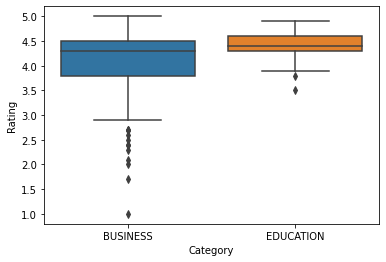

In [167]:
import seaborn as sns
bus_edu = pd.concat([apps[apps['Category'] == 'BUSINESS'], apps[apps['Category'] == 'EDUCATION']])
sns.boxplot(x='Category',y='Rating',data=bus_edu)